<a href="https://colab.research.google.com/github/sanchalee19/ML-sem-6/blob/main/decisiontree(assgn_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Assignment

Problem: Loan repayment prediction. [Dataset](https://drive.google.com/file/d/1jSEd8FUb1qQjrxYiQxr_Lp80_mI6ZwnT/view?usp=sharing)

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt


### Dataset info

In [ ]:
balance_data = pd.read_csv('/content/Decision_Tree_ Dataset.csv',
sep= ',', header= 0)

In [ ]:
balance_data

,Initial_payment,Final_payment,Credit_score,House_number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No


In [ ]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Initial_payment  1000 non-null   int64 
 1   Final_payment    1000 non-null   int64 
 2   Credit_score     1000 non-null   int64 
 3   House_number     1000 non-null   int64 
 4   Sum              1000 non-null   int64 
 5   Result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [ ]:
balance_data.describe()

,Initial_payment,Final_payment,Credit_score,House_number,Sum
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000,17315.280000
std,115.81539,1440.15617,259.796059,565.164179,1589.943875
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000
25%,195.00000,11201.50000,302.000000,3545.000000,16073.750000
50%,289.50000,12450.00000,516.500000,4041.500000,17383.000000
75%,398.00000,13678.25000,753.500000,4507.000000,18595.250000
max,500.00000,14996.00000,997.000000,5000.000000,20737.000000


In [ ]:
balance_data.shape

(1000, 6)

### Checking Null values

In [ ]:
balance_data.isna().sum()

Initial_payment    0
Final_payment      0
Credit_score       0
House_number       0
Sum                0
Result             0
dtype: int64

### Seperating Dependent-Independent Variables

In [ ]:
X = balance_data.values[:, 1:4]
Y = balance_data.values[:,5]

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

### Modelling

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### Predictions

In [ ]:
y_pred = clf_entropy.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

### Accuracy

In [ ]:
print ("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 93.66666666666667)

### Confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[134,  13],
       [  6, 147]])

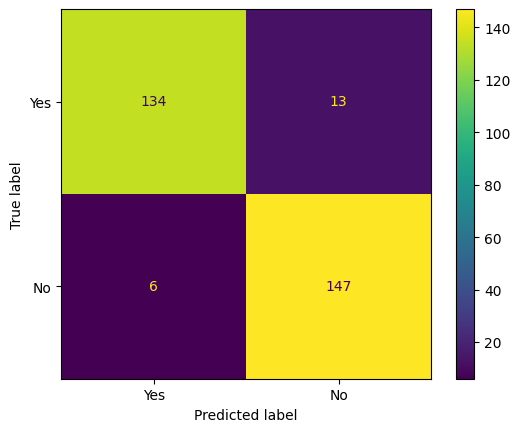

In [ ]:
ConfusionMatrixDisplay.from_estimator(
clf_entropy,
X_test,
y_test,
display_labels = ['Yes', 'No']
)